## Name: Ishan Prabhune
## A20538828

In [1]:
#K-Means Clustering 

import warnings
warnings.filterwarnings('ignore')

#Importing the Python Libraries

import pandas as pd
from sklearn import preprocessing
from IPython.display import display, HTML

DataFrame=pd.read_csv('C:/Users/ishan/Downloads/Malware Data/malware_MultiClass.csv')

# Shape of the DataFrame
print(DataFrame.shape)

# Striping the column names
DataFrame=DataFrame.rename(columns=lambda x: x.strip())

# Cleaning the Data
cols=DataFrame.columns

# print out and display DataFrameframe as tables in HTML
display(HTML(DataFrame.head(5).to_html()))

(100000, 36)


,hash,millisecond,classification,os,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,vm_truncate_count,task_size,cached_hole_size,free_area_cache,mm_users,map_count,hiwater_rss,total_vm,shared_vm,exec_vm,reserved_vm,nr_ptes,end_data,last_interval,nvcsw,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914e223349672eca79ad0,0,malware,CentOS,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914e223349672eca79ad0,1,malware,Windows,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914e223349672eca79ad0,2,malware,Mac,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914e223349672eca79ad0,3,malware,Ubuntu,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914e223349672eca79ad0,4,malware,Mac,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0


In [2]:
# Checking for missing values in DataFrame
print('ColumnName, DataType, MissingValues')
for i in cols:
    print(i, ',', DataFrame[i].dtype,',', DataFrame[i].isnull().any())

ColumnName, DataType, MissingValues
hash , object , False
millisecond , int64 , False
classification , object , False
os , object , False
state , int64 , False
usage_counter , int64 , False
prio , int64 , False
static_prio , int64 , False
normal_prio , int64 , False
policy , int64 , False
vm_pgoff , int64 , False
vm_truncate_count , int64 , False
task_size , int64 , False
cached_hole_size , int64 , False
free_area_cache , int64 , False
mm_users , int64 , False
map_count , int64 , False
hiwater_rss , int64 , False
total_vm , int64 , False
shared_vm , int64 , False
exec_vm , int64 , False
reserved_vm , int64 , False
nr_ptes , int64 , False
end_data , int64 , False
last_interval , int64 , False
nvcsw , int64 , False
nivcsw , int64 , False
min_flt , int64 , False
maj_flt , int64 , False
fs_excl_counter , int64 , False
lock , int64 , False
utime , int64 , False
stime , int64 , False
gtime , int64 , False
cgtime , int64 , False
signal_nvcsw , int64 , False


In [3]:
# Selecting the Required Columns
SelectedColumns = ['classification','os','usage_counter','prio','static_prio','normal_prio','vm_pgoff','vm_truncate_count','task_size','map_count','hiwater_rss','total_vm','shared_vm','exec_vm','reserved_vm','nr_ptes','nvcsw','nivcsw','signal_nvcsw']

# Extracting selected columns
DataFrame = DataFrame[SelectedColumns]

# Displaying the selected DataFrame
DataFrame.head(5)

,classification,os,usage_counter,prio,static_prio,normal_prio,vm_pgoff,vm_truncate_count,task_size,map_count,hiwater_rss,total_vm,shared_vm,exec_vm,reserved_vm,nr_ptes,nvcsw,nivcsw,signal_nvcsw
0,malware,CentOS,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
1,malware,Windows,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
2,malware,Mac,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
3,malware,Ubuntu,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
4,malware,Mac,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0


In [4]:
# Excluding the label, for the clustering task
DataFrame=DataFrame.drop('classification', axis=1) 

print('Column DataFrametypes:\n',DataFrame.dtypes)
DataFrame.head(5)

Column DataFrametypes:
 os                   object
usage_counter         int64
prio                  int64
static_prio           int64
normal_prio           int64
vm_pgoff              int64
vm_truncate_count     int64
task_size             int64
map_count             int64
hiwater_rss           int64
total_vm              int64
shared_vm             int64
exec_vm               int64
reserved_vm           int64
nr_ptes               int64
nvcsw                 int64
nivcsw                int64
signal_nvcsw          int64
dtype: object


,os,usage_counter,prio,static_prio,normal_prio,vm_pgoff,vm_truncate_count,task_size,map_count,hiwater_rss,total_vm,shared_vm,exec_vm,reserved_vm,nr_ptes,nvcsw,nivcsw,signal_nvcsw
0,CentOS,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
1,Windows,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
2,Mac,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
3,Ubuntu,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
4,Mac,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0


In [5]:
# Removing the columns which has all 0 values
DataFrame_zero = DataFrame.columns[(DataFrame == 0).all()]
DataFrame = DataFrame.drop(columns=DataFrame_zero)
DataFrame.head(5)

,os,prio,static_prio,vm_truncate_count,map_count,total_vm,shared_vm,exec_vm,reserved_vm,nvcsw,nivcsw
0,CentOS,3069378560,14274,13173,6850,150,120,124,210,341974,0
1,Windows,3069378560,14274,13173,6850,150,120,124,210,341974,0
2,Mac,3069378560,14274,13173,6850,150,120,124,210,341974,0
3,Ubuntu,3069378560,14274,13173,6850,150,120,124,210,341974,0
4,Mac,3069378560,14274,13173,6850,150,120,124,210,341974,0


In [6]:
# Converting all nominal variables to binary variables
DataFrame_num=DataFrame.copy(deep=True) 

# Creating the new binary columns
DataFrame_dummies=pd.get_dummies(DataFrame_num[['os']],dtype=float)

# Add them to DataFrame
DataFrame_num=DataFrame_num.join(DataFrame_dummies)

# Dropping original columns
DataFrame_num=DataFrame_num.drop('os',axis=1)

DataFrame_num.head(5)

,prio,static_prio,vm_truncate_count,map_count,total_vm,shared_vm,exec_vm,reserved_vm,nvcsw,nivcsw,os_CentOS,os_Debian,os_Mac,os_Ubuntu,os_Windows
0,3069378560,14274,13173,6850,150,120,124,210,341974,0,1.0,0.0,0.0,0.0,0.0
1,3069378560,14274,13173,6850,150,120,124,210,341974,0,0.0,0.0,0.0,0.0,1.0
2,3069378560,14274,13173,6850,150,120,124,210,341974,0,0.0,0.0,1.0,0.0,0.0
3,3069378560,14274,13173,6850,150,120,124,210,341974,0,0.0,0.0,0.0,1.0,0.0
4,3069378560,14274,13173,6850,150,120,124,210,341974,0,0.0,0.0,1.0,0.0,0.0


In [7]:
# Dropping the extra binary columns, since we only need N-1 binary columns
DataFrame_num=DataFrame_num.drop('os_Windows', axis=1)

display('DataFrame_num:',HTML(DataFrame_num.head(10).to_html()))

'DataFrame_num:'

,prio,static_prio,vm_truncate_count,map_count,total_vm,shared_vm,exec_vm,reserved_vm,nvcsw,nivcsw,os_CentOS,os_Debian,os_Mac,os_Ubuntu
0,3069378560,14274,13173,6850,150,120,124,210,341974,0,1.0,0.0,0.0,0.0
1,3069378560,14274,13173,6850,150,120,124,210,341974,0,0.0,0.0,0.0,0.0
2,3069378560,14274,13173,6850,150,120,124,210,341974,0,0.0,0.0,1.0,0.0
3,3069378560,14274,13173,6850,150,120,124,210,341974,0,0.0,0.0,0.0,1.0
4,3069378560,14274,13173,6850,150,120,124,210,341974,0,0.0,0.0,1.0,0.0
5,3069378560,14274,13173,6850,150,120,124,210,341974,0,0.0,0.0,0.0,0.0
6,3069378560,14274,13173,6850,150,120,124,210,341974,0,0.0,0.0,0.0,1.0
7,3069378560,14274,13173,6850,150,120,124,210,341974,0,0.0,0.0,1.0,0.0
8,3069378560,14274,13173,6850,150,120,124,210,341974,0,1.0,0.0,0.0,0.0
9,3069378560,14274,13173,6852,150,120,124,211,341974,0,0.0,0.0,1.0,0.0


In [8]:
# Normalized all numerical features
# min-max normalization to scale [0, 1]
cols_to_norm = DataFrame_num.columns.to_list()
DataFrame_num[cols_to_norm] = DataFrame_num[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# We ignore the label column
DataFrame_knn=DataFrame_num.copy(deep=True)
DataFrame_kmeans=DataFrame_num.copy(deep=True)
display(HTML(DataFrame_kmeans.head(10).to_html()))

,prio,static_prio,vm_truncate_count,map_count,total_vm,shared_vm,exec_vm,reserved_vm,nvcsw,nivcsw,os_CentOS,os_Debian,os_Mac,os_Ubuntu
0,0.18254,0.016007,0.199175,0.166510,0.052031,1.0,0.307692,0.249311,0.091519,0.0,1.0,0.0,0.0,0.0
1,0.18254,0.016007,0.199175,0.166510,0.052031,1.0,0.307692,0.249311,0.091519,0.0,0.0,0.0,0.0,0.0
2,0.18254,0.016007,0.199175,0.166510,0.052031,1.0,0.307692,0.249311,0.091519,0.0,0.0,0.0,1.0,0.0
3,0.18254,0.016007,0.199175,0.166510,0.052031,1.0,0.307692,0.249311,0.091519,0.0,0.0,0.0,0.0,1.0
4,0.18254,0.016007,0.199175,0.166510,0.052031,1.0,0.307692,0.249311,0.091519,0.0,0.0,0.0,1.0,0.0
5,0.18254,0.016007,0.199175,0.166510,0.052031,1.0,0.307692,0.249311,0.091519,0.0,0.0,0.0,0.0,0.0
6,0.18254,0.016007,0.199175,0.166510,0.052031,1.0,0.307692,0.249311,0.091519,0.0,0.0,0.0,0.0,1.0
7,0.18254,0.016007,0.199175,0.166510,0.052031,1.0,0.307692,0.249311,0.091519,0.0,0.0,0.0,1.0,0.0
8,0.18254,0.016007,0.199175,0.166510,0.052031,1.0,0.307692,0.249311,0.091519,0.0,1.0,0.0,0.0,0.0
9,0.18254,0.016007,0.199175,0.166589,0.052031,1.0,0.307692,0.250689,0.091519,0.0,0.0,0.0,1.0,0.0


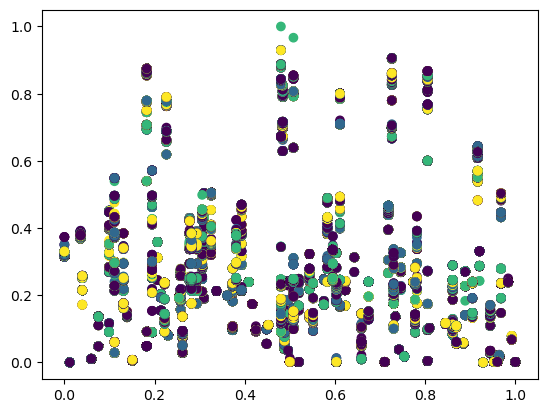

In [9]:
# By K-Means

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans

# API, https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

kmeans=KMeans(n_clusters=4, random_state=1,max_iter=500)
kmeans.fit(DataFrame_kmeans)
y_pred=kmeans.predict(DataFrame_kmeans)

plt.scatter(DataFrame_kmeans['prio'],DataFrame_kmeans['nvcsw'],c=y_pred,cmap='viridis')

In [10]:
# Getting the cluster labels and then adding it back to the original DataFrame
opt=kmeans.labels_
DataFrame_knn['Cluster']=opt
display('DataFrame:',HTML(DataFrame_knn.head(10).to_html()))

'DataFrame:'

,prio,static_prio,vm_truncate_count,map_count,total_vm,shared_vm,exec_vm,reserved_vm,nvcsw,nivcsw,os_CentOS,os_Debian,os_Mac,os_Ubuntu,Cluster
0,0.18254,0.016007,0.199175,0.166510,0.052031,1.0,0.307692,0.249311,0.091519,0.0,1.0,0.0,0.0,0.0,2
1,0.18254,0.016007,0.199175,0.166510,0.052031,1.0,0.307692,0.249311,0.091519,0.0,0.0,0.0,0.0,0.0,0
2,0.18254,0.016007,0.199175,0.166510,0.052031,1.0,0.307692,0.249311,0.091519,0.0,0.0,0.0,1.0,0.0,3
3,0.18254,0.016007,0.199175,0.166510,0.052031,1.0,0.307692,0.249311,0.091519,0.0,0.0,0.0,0.0,1.0,1
4,0.18254,0.016007,0.199175,0.166510,0.052031,1.0,0.307692,0.249311,0.091519,0.0,0.0,0.0,1.0,0.0,3
5,0.18254,0.016007,0.199175,0.166510,0.052031,1.0,0.307692,0.249311,0.091519,0.0,0.0,0.0,0.0,0.0,0
6,0.18254,0.016007,0.199175,0.166510,0.052031,1.0,0.307692,0.249311,0.091519,0.0,0.0,0.0,0.0,1.0,1
7,0.18254,0.016007,0.199175,0.166510,0.052031,1.0,0.307692,0.249311,0.091519,0.0,0.0,0.0,1.0,0.0,3
8,0.18254,0.016007,0.199175,0.166510,0.052031,1.0,0.307692,0.249311,0.091519,0.0,1.0,0.0,0.0,0.0,2
9,0.18254,0.016007,0.199175,0.166589,0.052031,1.0,0.307692,0.250689,0.091519,0.0,0.0,0.0,1.0,0.0,3


1.5


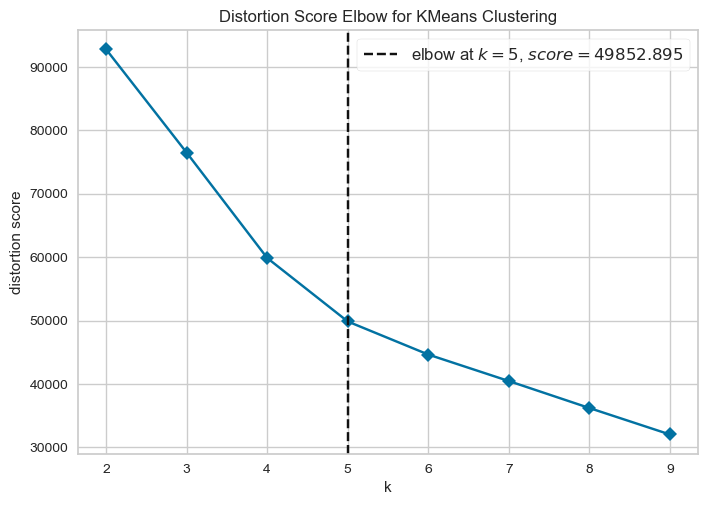

'DataFrame:'

,prio,static_prio,vm_truncate_count,map_count,total_vm,shared_vm,exec_vm,reserved_vm,nvcsw,nivcsw,os_CentOS,os_Debian,os_Mac,os_Ubuntu,Cluster
99990,0.928571,0.0,0.040717,0.04153,0.01283,1.0,0.048077,0.084022,0.0,0.005479,0.0,1.0,0.0,0.0,0
99991,0.928571,0.0,0.040717,0.04153,0.01283,1.0,0.048077,0.084022,0.0,0.005479,0.0,0.0,0.0,1.0,2
99992,0.928571,0.0,0.040717,0.04153,0.01283,1.0,0.048077,0.084022,0.0,0.005479,1.0,0.0,0.0,0.0,1
99993,0.928571,0.0,0.040717,0.04153,0.01283,1.0,0.048077,0.084022,0.0,0.005479,0.0,1.0,0.0,0.0,0
99994,0.928571,0.0,0.040717,0.04153,0.01283,1.0,0.048077,0.084022,0.0,0.005479,0.0,1.0,0.0,0.0,0
99995,0.928571,0.0,0.040717,0.04153,0.01283,1.0,0.048077,0.084022,0.0,0.005479,1.0,0.0,0.0,0.0,1
99996,0.928571,0.0,0.040717,0.04153,0.01283,1.0,0.048077,0.084022,0.0,0.005479,0.0,0.0,0.0,0.0,0
99997,0.928571,0.0,0.040717,0.04153,0.01283,1.0,0.048077,0.084022,0.0,0.005479,1.0,0.0,0.0,0.0,1
99998,0.928571,0.0,0.040717,0.04153,0.01283,1.0,0.048077,0.084022,0.0,0.005479,0.0,0.0,0.0,1.0,2
99999,0.928571,0.0,0.040717,0.04153,0.01283,1.0,0.048077,0.084022,0.0,0.005479,0.0,0.0,1.0,0.0,0


In [12]:
# try different K value and find the best K for KMeans by using Elbow method

import yellowbrick
from yellowbrick.cluster import KElbowVisualizer
# API, https://www.scikit-yb.org/en/latest/api/cluster/elbow.html
print(yellowbrick.__version__)

km = KMeans(random_state=42,max_iter=500, algorithm='elkan')
visualizer = KElbowVisualizer(km, k=(2,10), timings=False, distance_metric='euclidean', metric='distortion')

# Fitting the DataFrame to the visualizer
visualizer.fit(DataFrame_kmeans)        

# Finalize and render the figure
visualizer.show()        
    
# find the best K value
km = KMeans(n_clusters=3)
km = km.fit(DataFrame_kmeans)

# Clustering the labels to each data point based on the clustering results
opt=km.labels_
DataFrame_knn['Cluster']=opt
display('DataFrame:',HTML(DataFrame_knn.tail(10).to_html()))

In [15]:
#Evaluating the K-Means results by using at least two methods

# Silhouette Score
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters = 4 , max_iter=500, random_state=42, algorithm='elkan')
kmeans.fit(DataFrame_kmeans)
SilhouetteScore = silhouette_score(DataFrame_kmeans, kmeans.labels_)
print('K = 4 Silhouette score is', SilhouetteScore)


kmeans = KMeans(n_clusters = 5 , max_iter=500, random_state=42, algorithm='elkan')
kmeans.fit(DataFrame_kmeans)
SilhouetteScore = silhouette_score(DataFrame_kmeans, kmeans.labels_)
print('K = 5 Silhouette score is', SilhouetteScore)


K = 4 Silhouette score is 0.346678081334281
K = 5 Silhouette score is 0.3423073806476197


## Conclusion:


KMeans clustering with Yellowbrick determined **K=5** as the optimal number of clusters, with a distortion score of **49852.895**. Re-running with **K=3**, cluster labels were assigned. The Elbow method graph visually displayed the significant decrease in distortion up to **K=5**, aiding in effective data segmentation-


Two evaluation methods were applied to the K-Means clustering results:

1. **Silhouette Score**:
   - For K=4, the Silhouette score is **0.3467**.
   - For K=5, the Silhouette score is **0.3423**.

These scores indicate the quality of clustering, where a higher Silhouette score implies better-defined clusters. The results suggest that K=4 provides slightly better clustering results based on Silhouettedataset.

>
